Build a regression model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_features = pd.read_csv("../data/features.csv")
df_features

/var/folders/63/d8v7zgcx0mxg0c0j6qhp5ln00000gn/T/ipykernel_3873/3179697687.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Free Bikes
0,8.06,926.8,4.435000,879.335943,0
1,9.26,560.7,4.725000,532.596303,2
2,8.09,755.9,4.465000,919.578830,1
3,6.80,814.2,4.495000,1107.131736,0
4,8.07,852.0,4.520000,901.395749,2
...,...,...,...,...,...
266,8.91,761.8,4.395000,888.110170,0
267,6.46,599.5,3.420000,443.417944,0
268,7.85,843.5,4.015000,1014.164561,0
269,7.50,501.3,3.714286,641.720977,0


In [2]:
correlation_matrix = df_features.corr(numeric_only=True)
correlation_matrix

,Average_rating_F,Average_dist_F,Average_rating_Y,Average_distance_Y,Free Bikes
Average_rating_F,1.000000,-0.225358,0.806357,-0.204887,0.059609
Average_dist_F,-0.225358,1.000000,-0.078681,0.484806,0.017175
Average_rating_Y,0.806357,-0.078681,1.000000,-0.098209,0.081159
Average_distance_Y,-0.204887,0.484806,-0.098209,1.000000,-0.038748
Free Bikes,0.059609,0.017175,0.081159,-0.038748,1.000000


In [4]:
y = df_features['Free Bikes']
X = df_features[['Average_distance_Y', 'Average_rating_F', 'Average_dist_F']]
X = sm.add_constant(X)  # adds a column of 1's for the intercept
X.head()

,const,Average_distance_Y,Average_rating_F,Average_dist_F
0,1.0,879.335943,8.06,926.8
1,1.0,532.596303,9.26,560.7
2,1.0,919.578830,8.09,755.9
3,1.0,1107.131736,6.80,814.2
4,1.0,901.395749,8.07,852.0


In [7]:
import numpy as np

# Check for missing values
print(y.isna().sum())
print(X.isna().sum())

# Check for infinite values
print(y.isin([np.inf, -np.inf]).sum())
print(X.isin([np.inf, -np.inf]).sum())

0
const                  0
Average_distance_Y     0
Average_rating_F      30
Average_dist_F         0
dtype: int64
0
const                 0
Average_distance_Y    0
Average_rating_F      0
Average_dist_F        0
dtype: int64


In [9]:
# Combine y and X, drop rows with NaN, and then split them again
combined_df = pd.concat([y, X], axis=1)
cleaned_df = combined_df.dropna()
y_clean = cleaned_df['Free Bikes']
X_clean = cleaned_df.drop('Free Bikes', axis=1)


In [11]:
model = sm.OLS(y_clean, X_clean)
results = model.fit()

Provide model output and an interpretation of the results. 

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Free Bikes   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.4426
Date:                Wed, 14 Feb 2024   Prob (F-statistic):              0.723
Time:                        01:00:34   Log-Likelihood:                -620.80
No. Observations:                 241   AIC:                             1250.
Df Residuals:                     237   BIC:                             1264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1012      2

In [13]:
#The OLS regression model, aimed at predicting the number of free bikes based on factors like average distance and rating, exhibits a low explanatory power, as indicated by an R-squared value of just 0.006. This suggests that only a tiny fraction of the variability in 'Free Bikes' is accounted for by the model. Furthermore, the model's overall statistical insignificance, highlighted by a high Prob (F-statistic) value of 0.723, implies that the independent variables used may not be the right predictors for the number of free bikes.

#The coefficients of the independent variables are near zero, indicating minimal influence on the dependent variable. Moreover, the high p-values for these coefficients suggest that they are not statistically significant predictors. This is further supported by the wide confidence intervals, implying uncertainty about the coefficient estimates. The diagnostics indicate potential issues like non-normality of residuals and multicollinearity. Overall, these findings point towards the need for re-evaluating the model choice, the predictors used, or possibly incorporating additional relevant variables for a more accurate and reliable predictive model.

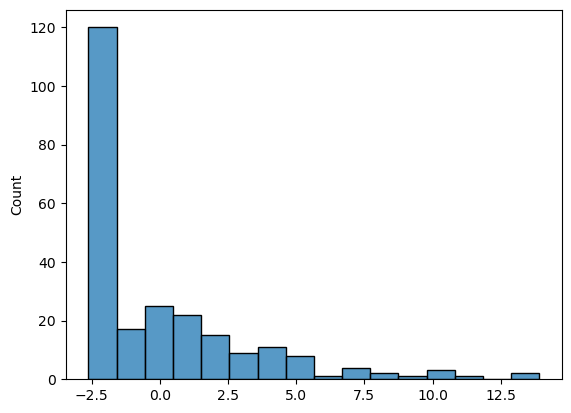

In [14]:
residuals = results.resid

sns.histplot(residuals)
plt.show()

In [15]:
results.params

const                -0.101245
Average_distance_Y   -0.000762
Average_rating_F      0.233520
Average_dist_F        0.001401
dtype: float64

In [16]:
# The model equation for prediction is: number_of_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F

b0 = results.params['const']
b1 = results.params['Average_distance_Y']
b2 = results.params['Average_rating_F']
b3 = results.params['Average_dist_F']

known_distance_Y = 585
known_rating = 9
known_dist_F = 777
predicted_num_bikes = b0 + b1*known_distance_Y + b2*known_rating + b3*known_dist_F
predicted_num_bikes

2.6435219540240373

# Stretch

How can you turn the regression model into a classification model?